# Distance vs Correlation

In [6]:
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Пример 1

In [46]:
a = np.array([5, 4])
b = np.array([2, 3])

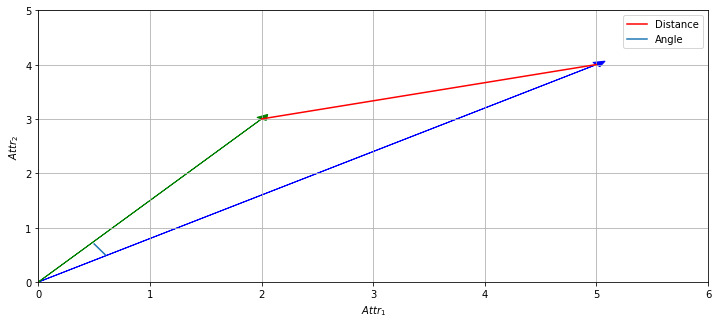

In [48]:
plt.figure(figsize=(12, 5))
plt.xlim(0, max(a[0], b[0]) + 1)
plt.ylim(0, max(a[1], b[1]) + 1)
plt.plot((b[0], a[0]), (b[1], a[1]), c='r', label="Distance")
plt.plot((0.5, 0.6), (0.7, 0.5), label="Angle")
plt.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.1, color='b')
plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, color='g')
plt.grid()
plt.legend(loc='best')
plt.xlabel("$Attr_1$")
plt.ylabel("$Attr_2$")

In [42]:
print("Distance:", euclidean_distances(a.reshape(1, -1), b.reshape(1, -1)))
print("Cosine:", cosine_similarity(a.reshape(1, -1), b.reshape(1, -1)))

Distance: [[ 3.16227766]]
Cosine: [[ 0.95292578]]


## Пример 2

In [49]:
a = np.array([4, 6])
b = np.array([2, 3])

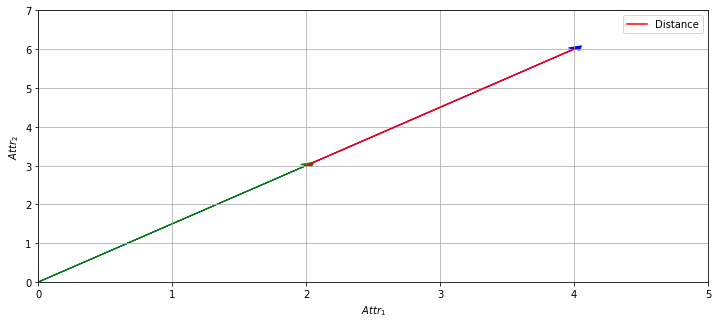

In [51]:
plt.figure(figsize=(12, 5))
plt.xlim(0, max(a[0], b[0]) + 1)
plt.ylim(0, max(a[1], b[1]) + 1)
plt.plot((b[0], a[0]), (b[1], a[1]), c='r', label="Distance")
plt.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.1, color='b')
plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, color='g')
plt.grid()
plt.legend(loc='best')
plt.xlabel("$Attr_1$")
plt.ylabel("$Attr_2$")

In [52]:
print("Distance:", euclidean_distances(a.reshape(1, -1), b.reshape(1, -1)))
print("Cosine:", cosine_similarity(a.reshape(1, -1), b.reshape(1, -1)))

Distance: [[ 3.60555128]]
Cosine: [[ 1.]]


# CBRS

In [1]:
from scipy.sparse import rand

In [3]:
# 100 объектов, 100 фич
item_profiles = rand(100, 100, 0.3, 'csr')

In [4]:
user_profile = rand(1, 100, 0.3, 'csr')

In [53]:
sims = cosine_similarity(user_profile, item_profiles)

In [55]:
best_iid = np.argsort(sims[0])[-1]
best_iid, sims[0, best_iid]

(71, 0.42781226689234952)

## Объясним рекомендацию

In [58]:
from sklearn.preprocessing import normalize
feature_contributions = normalize(user_profile).multiply(normalize(item_profiles[best_iid]))

In [62]:
TOP_FTRS = 3
for arg_id in np.argsort(feature_contributions.data)[-TOP_FTRS:]:
    ftr_id = feature_contributions.indices[arg_id]
    print(
        "Feature=%s, user value=%.3f, item value=%.3f" % 
        (ftr_id, user_profile[0, ftr_id], item_profiles[best_iid, ftr_id])
    )

Feature=13, user value=0.854, item value=0.805
Feature=7, user value=0.925, item value=0.800
Feature=87, user value=0.975, item value=0.828


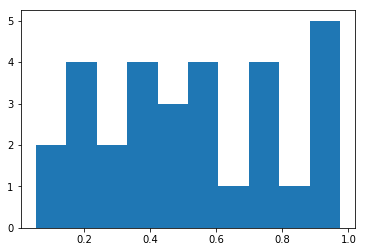

In [65]:
_ = plt.hist(user_profile.data)

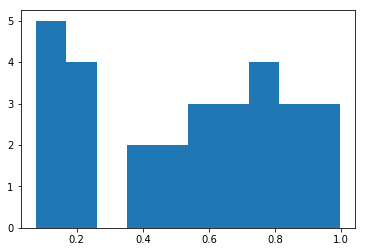

In [66]:
_ = plt.hist(item_profiles[best_iid].data)